In [1]:
import matplotlib.pyplot as plt
import re
import os
import sys
import numpy as np
from scipy.stats import norm
from settings_and_potential import *

import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from mpl_toolkits import mplot3d

# nrank = sys.argv[0]
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped_2d_ani_mod/"
font_size=20
lw=3
s=10
def U(x):
    res = s*(x*x-1)*(x*x-1)
    return res
myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"

import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

#######################################################
##### what do you want to run
#######################################################
## run the sample to check the look of the distributions 

q_noadax,p_noadax,g=openCfile_qp(path+"vec_noada_x.txt")
q_noaday,p_noaday,g=openCfile_qp(path+"vec_noada_y.txt")
q_trx,p_trx,g=openCfile_qp(path+"vec_tr_x.txt")
q_try,p_try,g=openCfile_qp(path+"vec_tr_y.txt")



## Ben's potential, anisotropic 

The potential is
\begin{equation}
q(x,y) = \frac{1+k_1 p_1(x,y) p_2(x,y)}{1+p_1(x,y)}+ k_3 \frac{k_2 p_1(x,y) p_2(x,y)}{1+k_2 p_2(x,y)} + k_4 x^2
\end{equation}

we have that 
$$
p_1(x,y)=(y-x**2+4)**2
$$
such that 
$$
\partial_x p_1(x,y)=-4x(y-x**2+4)
$$
and 
$$
\partial_y p_1(x,y)=2(y-x**2+4)
$$

and we have that 
$$
p_2(x,y)=(y+x^2-4)**2
$$
such that 
$$
\partial_x p_2(x,y)=4x(y+x^2-4)
$$
and 
$$
\partial_y p_2(x,y)=2(y+x^2-4)
$$

If the first term of $q(x,y)$ is $q_1(x,y)$ and the second is $q_2(x,y)$, we have that 
$$
\partial_i q_1(x,y) = \frac{\partial_i p_1 (k_1 p_2-1) + k_1 p_1 (1+p_1) \partial_i p_2}{(1+p_1)^2}
$$
and we have 

$$
\partial_i q_2(x,y) = k_2 \frac{k_2 \partial_i p_1 p_2^2+\partial_i p_1 p_2 + p_1 \partial_i p_2}{(1+k_2 p_2)^2}
$$


In [2]:
k1=0.5 #drives the lower
k2=500
k3=0.1
k4=1.
######################
# DEFINE THE POTENTIAL
######################
def getp1(x,y):
    return (y-x*x+2)**2
def getp2(x,y):
    return (y+x*x-2)**2

def Utest(x,y,k1,k2,k3,k4):
    p1=getp1(x,y)
    p2=getp2(x,y)
    res=(1+k1*p1*p2)/(1+k1*p1)+k3*(1+k2*p1*p2)/(1+k2*p2)+k4*x*x
    return res


TypeError: U() takes 1 positional argument but 2 were given

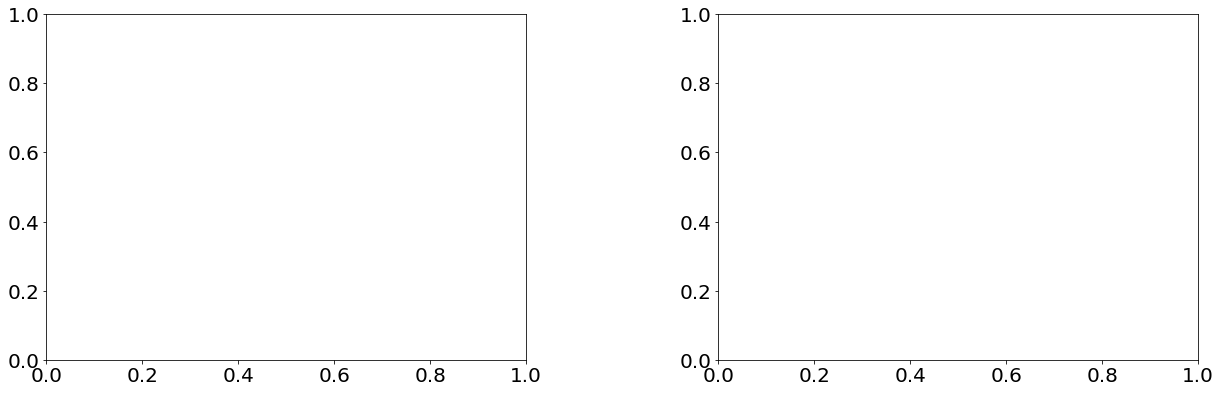

In [3]:
####################
##
#####################
tau=0.1
s=1
fig, (axs)= plt.subplots(1, 2,figsize=(20,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)


####################
## True distribution
#####################
beta=1/0.1
nbins=200
bound=6
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)
Z =U(X,Y)

pcm = axs[0].pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r', shading='auto')
axs[0].set_xlabel("x",fontsize=font_size)
axs[0].set_ylabel("y",fontsize=font_size)
fig.colorbar(pcm, ax=axs[0], extend='max')


# def Utry(x,y):
#     p1=getp1(x,y)
#     p2=getp2(x,y)
#     res=p2
#     return (res)

# Z2 =Utry(X,Y)


# pcm = axs[1].pcolor(X, Y, Z2,
#                    norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
#                    cmap='PuBu_r', shading='auto')
# # fig.colorbar(pcm, ax=axs[0], extend='max')

# # pcm = axs[0].pcolor(X, Y, Z, cmap='PuBu_r', shading='auto')
# axs[1].set_xlabel("x",fontsize=font_size)
# axs[1].set_ylabel("y",fontsize=font_size)

# fig.colorbar(pcm, ax=axs[1], extend='max')




# # ####################
# # ## Transformed distribution
# # #####################
# # nbins=100
# xedges = np.linspace(-bound,bound,nbins)
# yedges = np.linspace(-bound,bound,nbins)
# H, xedges, yedges = np.histogram2d(q_trx, q_try, bins=(xedges, yedges),density=True)
# axs[1].set_title('Transformed underdamped',fontsize=font_size,y=1.1)
# X, Y = np.meshgrid(xedges, yedges)
# pcm = axs[1].pcolor(X, Y, H,
#                    norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
#                    cmap='PuBu_r', shading='auto')
# fig.colorbar(pcm, ax=axs[1], extend='max')

# ####################
# ## Not adaptive distribution
# #####################
# nbins=100
# xedges = np.linspace(-bound,bound,nbins)
# yedges = np.linspace(-bound,bound,nbins)

# H, xedges, yedges = np.histogram2d(q_noadax, q_noaday, bins=(xedges, yedges))
# H.T
# axs[2].set_title('Underdamped',fontsize=font_size,y=1.1)
# X, Y = np.meshgrid(xedges, yedges)
# axs[2].pcolormesh(X, Y, H, norm=colors.LogNorm(vmin=np.exp(-1), vmax=np.max(H)))
# pcm = axs[2].pcolor(X, Y, H, cmap='PuBu_r', shading='auto')
# fig.colorbar(pcm, ax=axs[2], extend='max')
# plt.show()

## See how to affect the dynamic

Text(0.5, 0, '$x$')

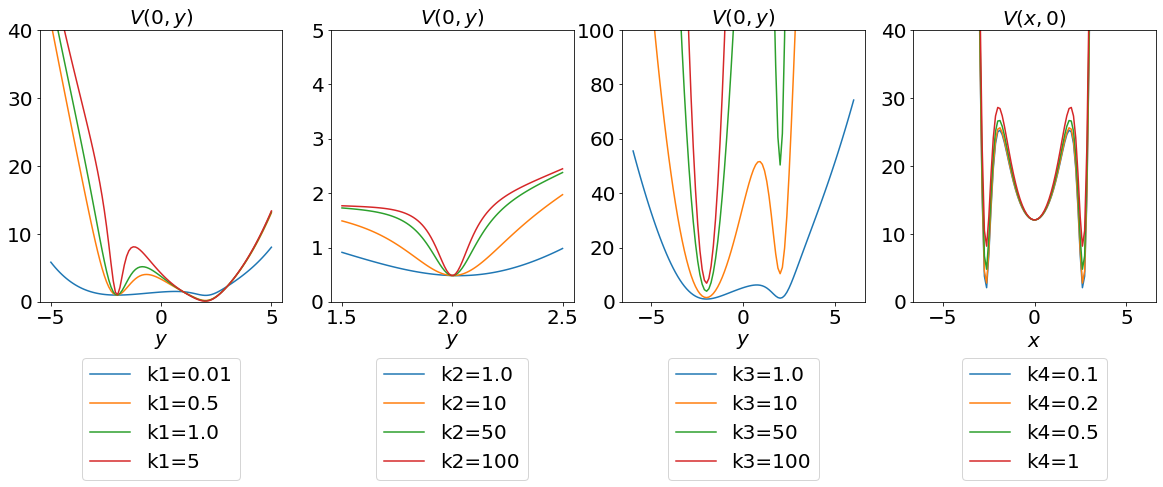

In [4]:
def Utest(x,y,k1,k2,k3,k4):
    p1=getp1(x,y)
    p2=getp2(x,y)
    res=(1+k1*p1*p2)/(1+k1*p1)+k3*(1+k2*p1*p2)/(1+k2*p2)+k4*x*x
    return res

k1=0.5 #drives the lower
k2=500 #drives the upper
k3=0.1
k4=1.

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(1, 4,figsize=(20,5))# plt.figure(figsize=(4,4))

# see what is happening when x=cst

# When k1 varies
#################

k1,k2,k3,k4=0.01,1.,0.1,0.1 #drives the lower
ax[0].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k1="+str(k1))
k1,k2,k3,k4=0.5,1,0.1,0.1 #drives the lower
ax[0].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k1="+str(k1))
k1,k2,k3,k4=1.,1,0.1,.1 #drives the lower
ax[0].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k1="+str(k1))
k1,k2,k3,k4=5,1,0.1,.1 #drives the lower
ax[0].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k1="+str(k1))

# When k2 varies
#################
# see what is happening when x=cst
yplot=np.linspace(1.5,2.5,100)
k1,k2,k3,k4=0.1,1.,0.1,0.1
ax[1].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k2="+str(k2))
k1,k2,k3,k4=0.1,10,0.1,0.1 
ax[1].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k2="+str(k2))
k1,k2,k3,k4=0.1,50,0.1,0.1 
ax[1].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k2="+str(k2))
k1,k2,k3,k4=.1,100,0.1,.1 
ax[1].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k2="+str(k2))

# When k3 varies
#################
# see what is happening when x=cst
yplot=np.linspace(-6,6,100)
k1,k2,k3,k4=0.1,1.,1.,0.1 
ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
k1,k2,k3,k4=0.1,1.,10,0.1 
ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
k1,k2,k3,k4=0.1,1.,50,0.1 
ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))
k1,k2,k3,k4=0.1,1.,100,0.1 
ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))


# When k4 varies
#################
# see what is happening when x=cst
yplot=np.linspace(-6,6,100)
ycst=5
k1,k2,k3,k4=0.1,1.,0.1,0.1 
ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
k1,k2,k3,k4=0.1,1.,0.1,0.2 
ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
k1,k2,k3,k4=0.1,1.,0.1,0.5 
ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))
k1,k2,k3,k4=0.1,1.,0.1,1 
ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))

ax[0].set_title("$V(0,y)$",fontsize=font_size)
ax[1].set_title("$V(0,y)$",fontsize=font_size)
ax[2].set_title("$V(0,y)$",fontsize=font_size)
ax[3].set_title("$V(x,0)$",fontsize=font_size)

ax[0].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[1].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[2].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)
ax[3].legend(fontsize=font_size, bbox_to_anchor=[0.5, -0.43], 
           loc='center', ncol=1)

ax[0].set_ylim([0,40])
ax[1].set_ylim([0,5])
ax[2].set_ylim([0,100])
ax[3].set_ylim([0,40])

ax[0].set_xlabel("$y$",fontsize=font_size)
ax[1].set_xlabel("$y$",fontsize=font_size)
ax[2].set_xlabel("$y$",fontsize=font_size)
ax[3].set_xlabel("$x$",fontsize=font_size)


# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)


## Plot the selected plots 

(0.0, 40.0)

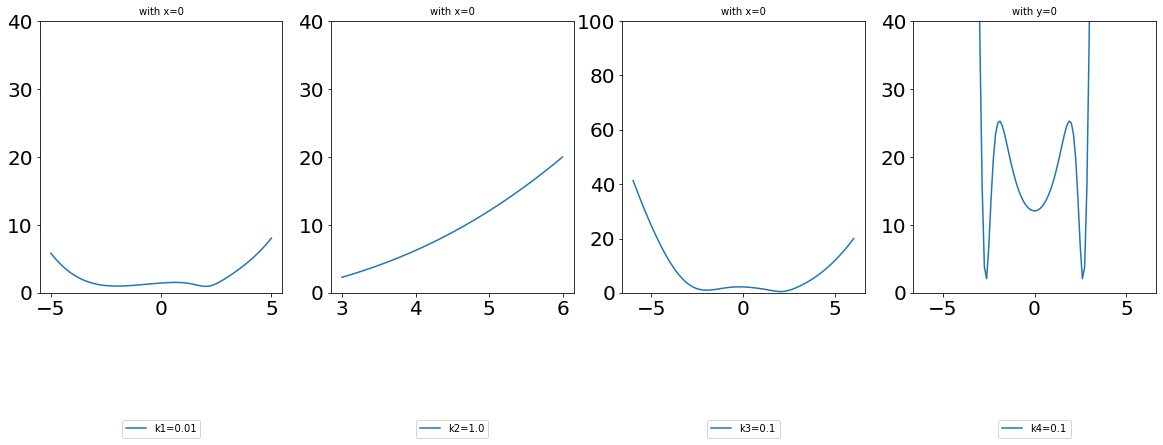

In [5]:
def Utest(x,y,k1,k2,k3,k4):
    p1=getp1(x,y)
    p2=getp2(x,y)
    res=(1+k1*p1*p2)/(1+k1*p1)+k3*(1+k2*p1*p2)/(1+k2*p2)+k4*x*x
    return res

k1=0.5 #drives the lower
k2=500 #drives the upper
k3=0.1
k4=1.

yplot=np.linspace(-5,5,100)

fig, (ax)= plt.subplots(1, 4,figsize=(20,5))# plt.figure(figsize=(4,4))

# see what is happening when x=cst

# When k1 varies
#################

k1,k2,k3,k4=0.01,1.,0.1,0.1 #drives the lower
ax[0].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k1="+str(k1))


# When k2 varies
#################
# see what is happening when x=cst
yplot=np.linspace(3,6,100)
k1,k2,k3,k4=0.1,1.,0.1,0.1
ax[1].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k2="+str(k2))


# When k3 varies
#################
# see what is happening when x=cst
yplot=np.linspace(-6,6,100)
k1,k2,k3,k4=0.1,1.,0.1,0.1 
ax[2].plot(yplot,Utest(0,yplot,k1,k2,k3,k4),label="k3="+str(k3))



# When k4 varies
#################
# see what is happening when x=cst
yplot=np.linspace(-6,6,100)
ycst=5
k1,k2,k3,k4=0.1,1.,0.1,0.1 
ax[3].plot(yplot,Utest(yplot,ycst,k1,k2,k3,k4),label="k4="+str(k4))


ax[0].set_title("with x=0",fontsize=font_size/2)
ax[1].set_title("with x=0",fontsize=font_size/2)
ax[2].set_title("with x=0",fontsize=font_size/2)
ax[3].set_title("with y=0",fontsize=font_size/2)

ax[0].legend(fontsize=font_size/2, bbox_to_anchor=[0.5, -0.5], 
           loc='center', ncol=1)
ax[1].legend(fontsize=font_size/2, bbox_to_anchor=[0.5, -0.5], 
           loc='center', ncol=1)
ax[2].legend(fontsize=font_size/2, bbox_to_anchor=[0.5, -0.5], 
           loc='center', ncol=1)
ax[3].legend(fontsize=font_size/2, bbox_to_anchor=[0.5, -0.5], 
           loc='center', ncol=1)

ax[0].set_ylim([0,40])
ax[1].set_ylim([0,40])
ax[2].set_ylim([0,100])
ax[3].set_ylim([0,40])

# ##See what is happening when y=cst
# Z =U(yplot,2)
# ax[1].plot(yplot,Z)
# ax[1].set_title("with y=2",fontsize=font_size)


# ax[1].set_ylim(0,20)


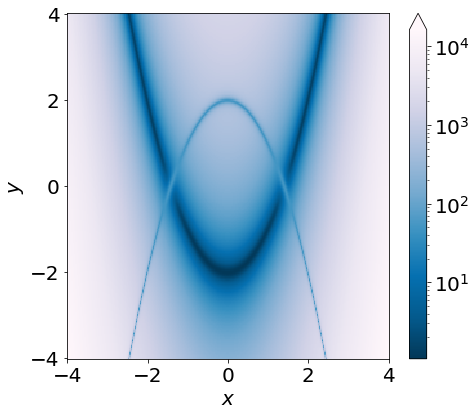

In [6]:
fig, (axs)= plt.subplots(1, 1,figsize=(7,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
c=0
d=-3.61
font_size=20
def Utest2(x,y,k1,k2,k3,k4):
    p1=getp1(x,y)
    p2=getp2(x,y)
    res=(1+k1*p1*p2)/(1+k1*p1)+k3*(1+k2*p1*p2)/(1+k2*p2)+k4*x*x#+k5*((x-c)*(x-c)+(y-d)*(y-d))
    return res

####################
## True distribution
#####################
beta=1/0.1
nbins=250
bound=4
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)
Z =Utest2(X,Y,0.1,50,50,0.1)

pcm = axs.pcolor(X, Y, Z,
                   norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r', shading='auto')
axs.set_xlabel("$x$",fontsize=font_size)
axs.set_ylabel("$y$",fontsize=font_size)
fig.colorbar(pcm, ax=axs, extend='max')



Text(0.5, 0.5, 'y')

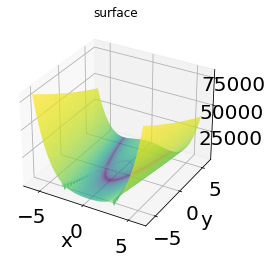

In [7]:
nbins=150
bound=6
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)

X, Y = np.meshgrid(X, Y)
Z =Utest2(X,Y,0.1,50,50,0.051)
# fig, (ax)= plt.subplots(1, 1,figsize=(7,7))# plt.figure(figsize=(4,4))

ax = plt.axes(projection='3d')

ax.plot_surface(X,Y, Z, rstride=1, cstride=1,  norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                cmap='viridis', edgecolor='none')
ax.set_title('surface');
# fig.colorbar(pcm, ax=ax, extend='max',cmap='viridis')


ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
# ax.set_zlabel('z',fontsize=20)

In [8]:
k1 = 10.;
k2 = 100.;
k3 =.5;
k4 = 0.1;

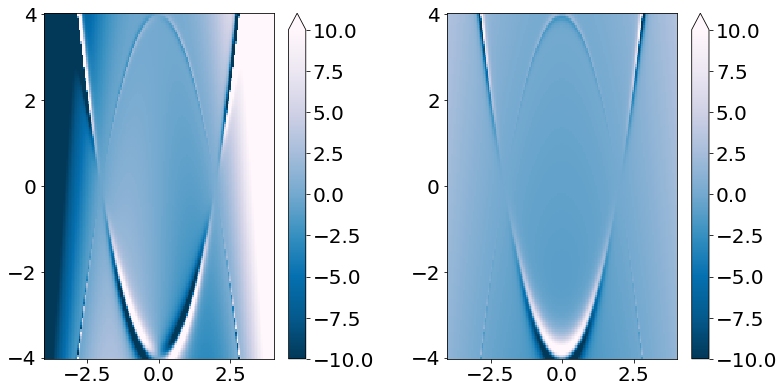

In [9]:
def getp1_x(x,y):
    return -4*x*(y-x*x+4)
def getp1_y(x,y):
    return 2*(y-x*x+4)
def getp2_x(x,y):
    return 4*x*(y+x*x-4)
def getp2_y(x,y):
    return 2*(y+x*x-4)

def Upx(x,y):
    x2 =x*x; 
    x3 = x*x2; 
    x4 = x*x3; 
    y2 = y*y;
    p1=pow(y-x2+4,2);
    p2=pow(y+x2-4,2);
    p1x = -2*(y-x2+4)*2*x;
    p1y = 2*(y-x2+4);
    p2x = +2*(y+x2-4)*2*x;
    p2y = 2*(y+x2-4);
    f1  = ((1+k1*p1)*(p1x*p2 + p1*p2x)-p1*p2*k1*p1x)/pow(1+k1*p1,2);
    f1  =f1+ k3* ((1+k2*p2)*(p1x*p2 + p1*p2x)-p1*p2*k2*p2x)/pow(1+k2*p2,2);
    f1  =f1+ 2*k4*x;
    return f1

def Upy(x,y):
    x2 =x*x; 
    x3 = x*x2; 
    x4 = x*x3; 
    y2 = y*y;
    p1=pow(y-x2+4,2);
    p2=pow(y+x2-4,2);
    p1x = -2*(y-x2+4)*2*x;
    p1y = 2*(y-x2+4);
    p2x = +2*(y+x2-4)*2*x;
    p2y = 2*(y+x2-4);
    f2  = +((1+k1*p1)*(p1y*p2 + p1*p2y)-p1*p2*k1*p1y)/pow(1+k1*p1,2);
    f2  =f2+k3* ((1+k2*p2)*(p1y*p2 + p1*p2y)-p1*p2*k2*p2y)/pow(1+k2*p2,2);
    return f2;

#####################
tau=0.1
s=1



####################
## True distribution
#####################
beta=1/0.1
nbins=50
bound=4
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)


fig, (axs)= plt.subplots(1, 2,figsize=(12,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)

####################
## True distribution
#####################
beta=1/0.1
nbins=150
bound=4
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)
Z =Upx(X,Y)

pcm = axs[0].pcolor(X, Y, Z,
                   norm = colors.Normalize(vmin=-10, vmax=10),
                   cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs[0], extend='max')

Z =Upy(X,Y)

pcm = axs[1].pcolor(X, Y, Z,
                   norm = colors.Normalize(vmin=-10, vmax=10),
                   cmap='PuBu_r', shading='auto')
fig.colorbar(pcm, ax=axs[1], extend='max')
plt.show()

## Visualise few trajectories

In [10]:
path = "/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/fewtraj2d_ani_mod"
#/////////////////////////////////////////
#// Anisotropique potential definition //

#define DIVTERM          //define to use
m=5      #     // minimum step scale factor
M=1.5      #       // maximum step scale factor
gamma=0.1         #   // friction coefficient
tau=0.1          #  // 'temperature'
T=50
dt=0.01
numruns= int(T/dt)         # // total number of trajectories
numsam=5  
r=0.01
nsnapshot=5


FileNotFoundError: [Errno 2] No such file or directory: '/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/fewtraj_ani_mod/smalldtvec_noada_x0.txt'

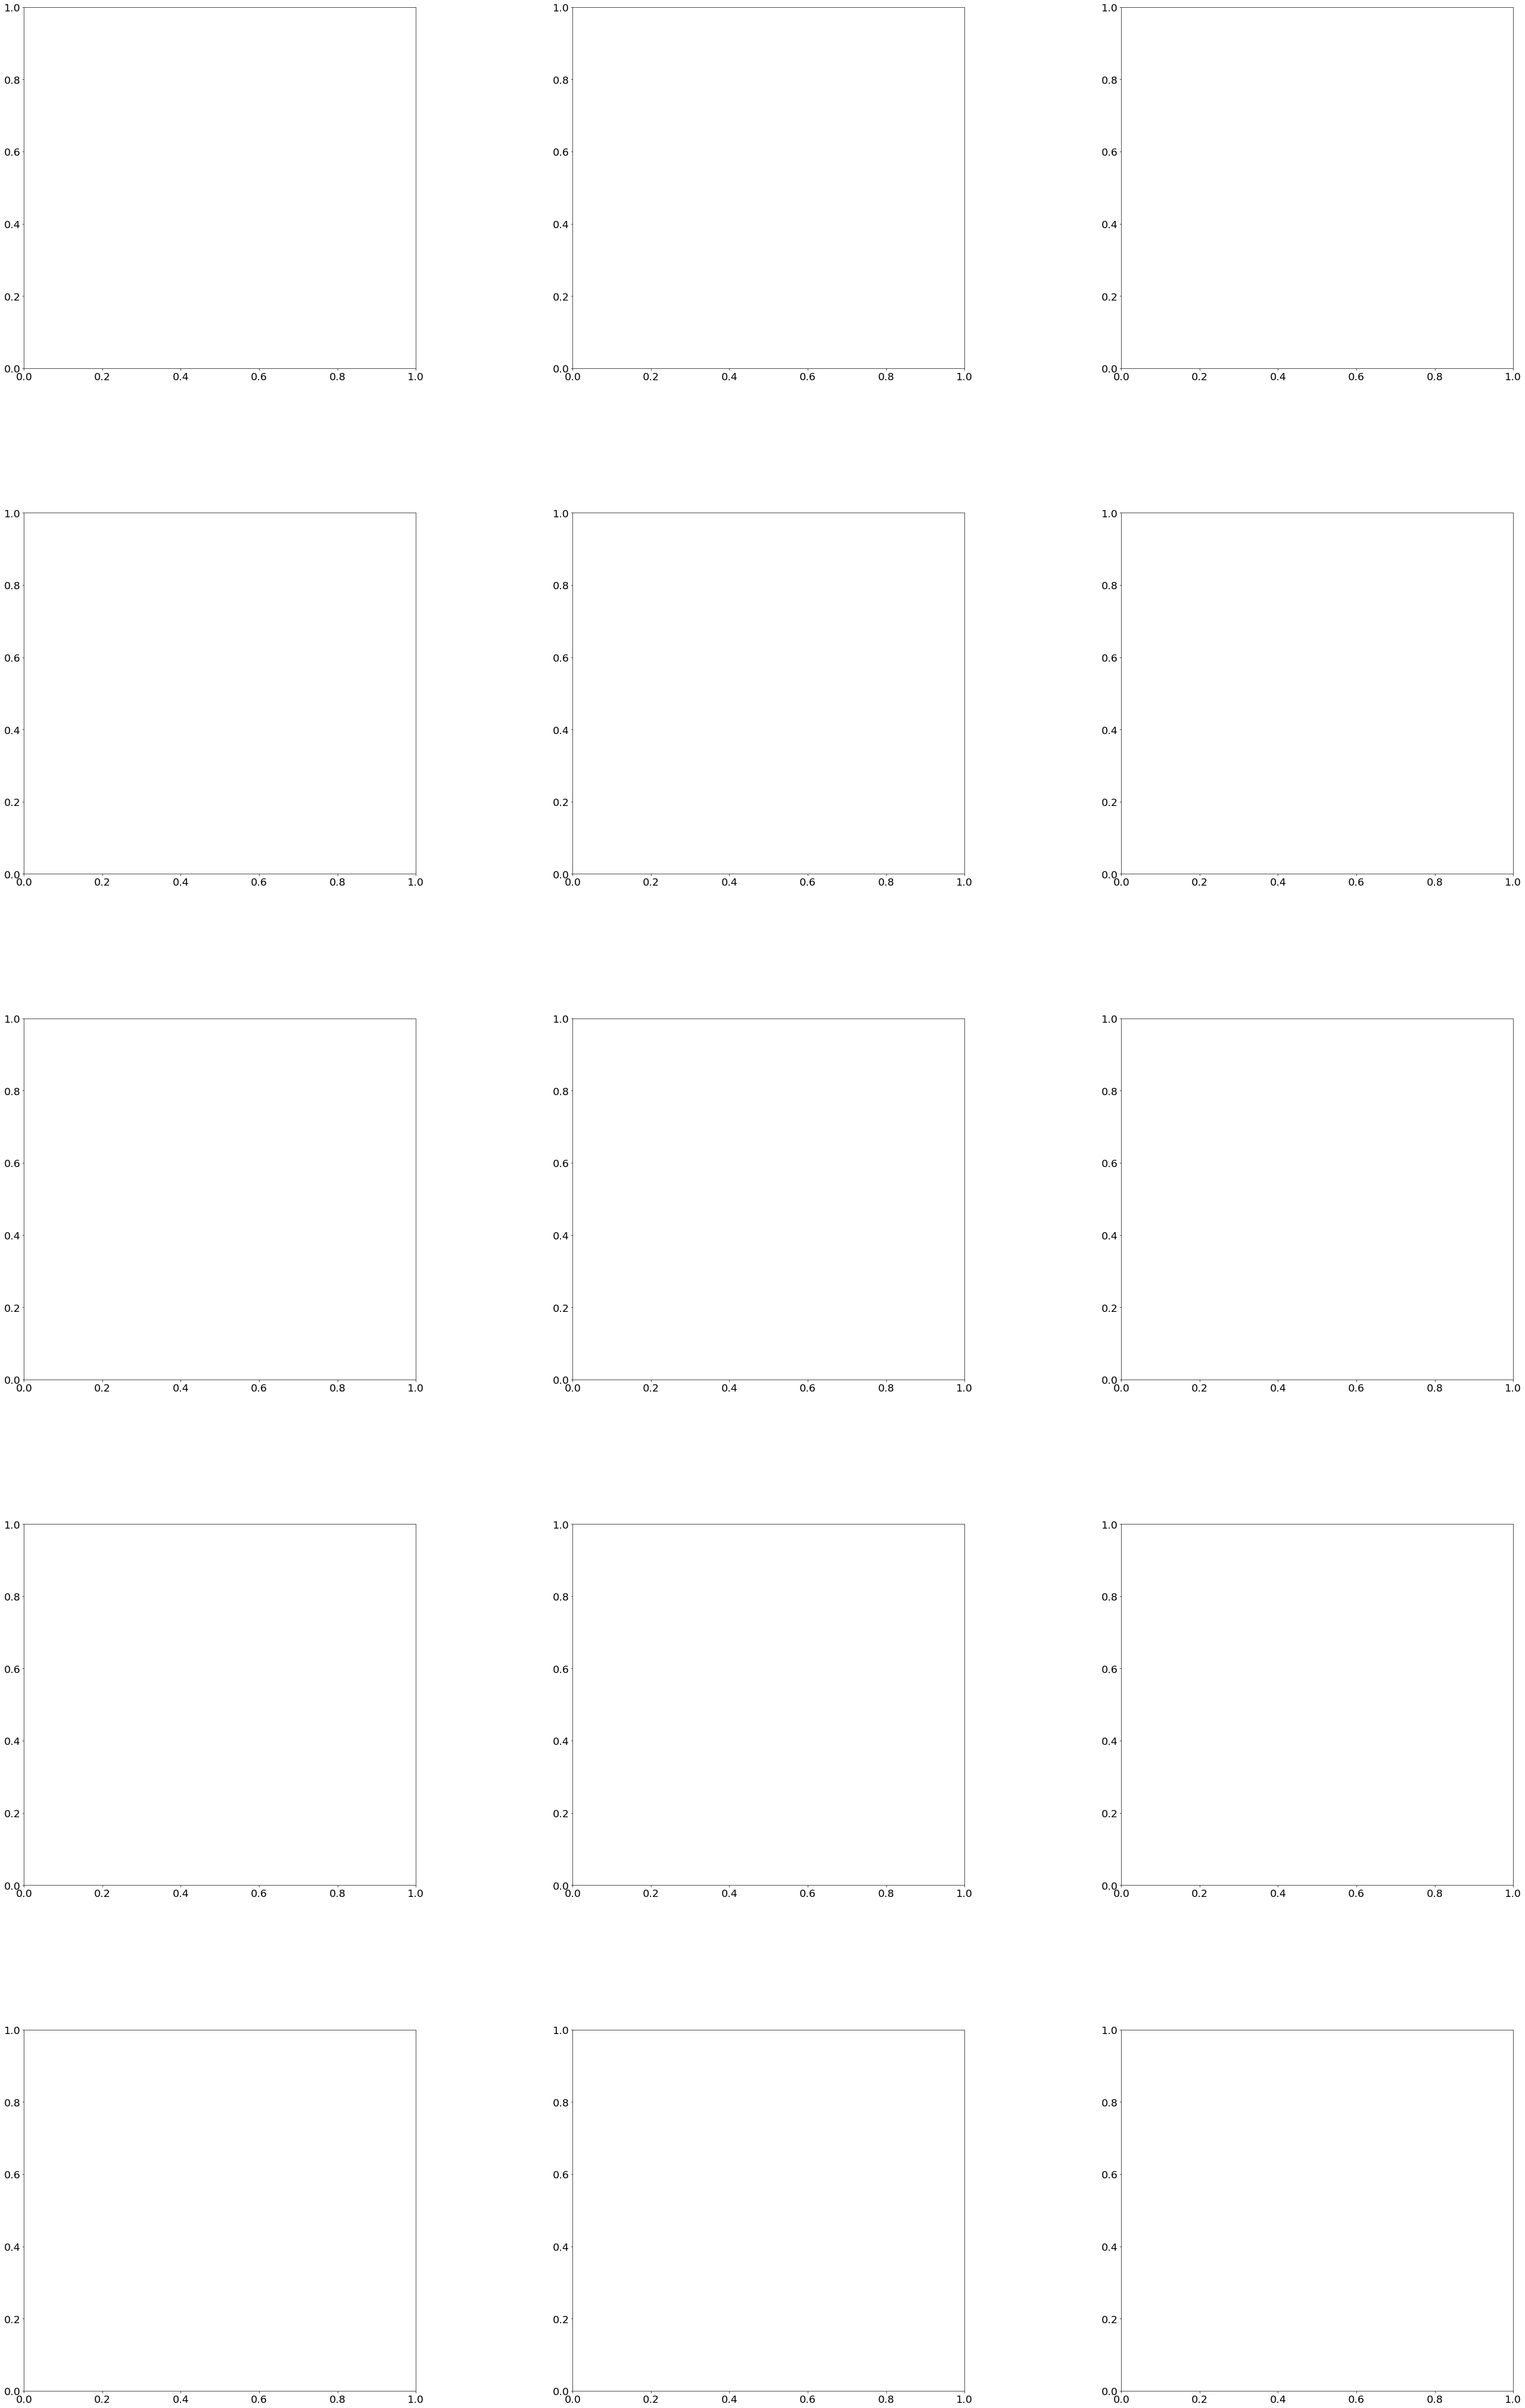

In [11]:
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/fewtraj_ani_mod/smalldt"

fig, ((axs))= plt.subplots(numsam,3,figsize=(50,80))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=45

for i in range(numsam):
    filename= path+"vec_noada_x"+str(i)+".txt"
    q_noada,p_noada,g=openCfile_qp(filename)
    filename= path+"vec_tr_x"+str(i)+".txt"
    q_tr,p_tr,g=openCfile_qp(filename)
    filename= path+"vec_tr_g"+str(i)+".txt"
    g,p_trnone,gnone=openCfile_qp(filename)

    t=np.linspace(0,len(q_noada),len(q_noada))

    # Q
    ###6
    axs[i,0].plot(t,q_noada,"-",linewidth=lw,label='Underdamped SDE',color=myred)
    axs[i,0].plot(t,q_tr,"--",linewidth=lw,alpha=0.7,label='Transformed\nunderdamped SDE',color=myblue)
    axs[i,0].set_ylim(-3,3)
    axs[i,0].set_ylabel("q", fontsize=font_size)
    axs[i,0].set_xlabel("Number of steps", fontsize=font_size)



    ############
    ## P vals ## 
    ############

    axs[i,1].plot(t,p_noada,"-",linewidth=lw,label='Underdamped SDE',color=myred)
    axs[i,1].plot(t,p_tr,"--",linewidth=lw,alpha=0.7,label='Transformed\nunderdamped SDE',color=myblue)
    axs[i,1].set_ylabel("p", fontsize=font_size)
    axs[i,1].set_xlabel("Number of steps", fontsize=font_size)

    ############
    ## Histograms g vals ## 
    ############
    range_bins_g=[0,M+0.1]
    histogram_g,bins = np.histogram(g,bins=nbins,range=range_bins_g, density=True)
    midx_noada = (bins[0:-1]+bins[1:])/2
    mean_g=round(np.mean(g),2)

    axs[i,2].plot(t,g,linewidth=lw*2,label='Average step='+str(mean_g),color=mygrey)
    axs[i,2].legend(fontsize=font_size, loc="upper center")
    axs[i,2].set_ylabel("g", fontsize=font_size)
    axs[i,2].set_xlabel("Number of steps", fontsize=font_size)

axs[0,0].legend(fontsize=font_size,loc="upper center",ncol=3,bbox_to_anchor=(0.8, 1.42))

# os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/C++/underdamped/visualisation")
# fig.savefig("figure/chains_anisotropic_under.eps",dpi=1000)
# fig.savefig("figure/chains_anisotropic_under.pdf")

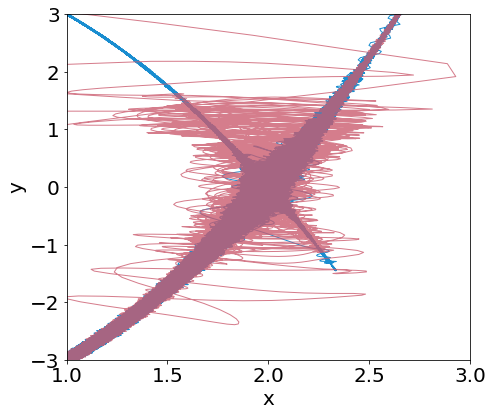

In [42]:
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/fewtraj_ani_mod/smalldt"
i=0
fig, ((axs))= plt.subplots(1,1,figsize=(7,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=20

# # for i in range(numsam):
# filename= path+"/vec_noada_x"+str(i)+".txt"
# q_noadax,p_noada,g=openCfile_qp(filename)
# filename= path+"/vec_tr_x"+str(i)+".txt"
# q_trx,p_tr,g=openCfile_qp(filename)
# filename= path+"/vec_tr_g"+str(i)+".txt"
# # g,p_trnone,gnone=openCfile_qp(filename)

# filename= path+"/vec_noada_y"+str(i)+".txt"
# q_noaday,p_noada,g=openCfile_qp(filename)
# filename= path+"/vec_tr_y"+str(i)+".txt"
# q_try,p_tr,g=openCfile_qp(filename)
# filename= path+"/vec_tr_g"+str(i)+".txt"
# g,p_trnone,gnone=openCfile_qp(filename)

# Q
###
lw=1.
axs.plot(q_trx,q_try,markersize=1,linewidth=lw,alpha=0.9,label="B$\\hat{\\rm{A}}\\hat{\\rm{O}}\\hat{\\rm{A}}$B",color=myblue)
axs.plot(q_noadax,q_noaday,linewidth=lw,label='BAOAB',alpha=0.8,color=myred)


axs.set_ylim(-3,3.)
axs.set_xlim(1,3)

axs.set_xlabel("x", fontsize=font_size)
axs.set_ylabel("y", fontsize=font_size)

# axs.legend(fontsize=font_size,ncol=2,loc="lower right")


fig.savefig("figures/bobsled_noada_ada_zoom_nolegend.png")

In [43]:
np.mean(g)

0.98758524364644

In [ ]:
fig, ((axs))= plt.subplots(1,1,figsize=(7,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=20

# # for i in range(numsam):
# filename= path+"/vec_noada_x"+str(i)+".txt"
# q_noadax,p_noada,g=openCfile_qp(filename)
# filename= path+"/vec_tr_x"+str(i)+".txt"
# q_trx,p_tr,g=openCfile_qp(filename)
# filename= path+"/vec_tr_g"+str(i)+".txt"
# # g,p_trnone,gnone=openCfile_qp(filename)

# filename= path+"/vec_noada_y"+str(i)+".txt"
# q_noaday,p_noada,g=openCfile_qp(filename)
# filename= path+"/vec_tr_y"+str(i)+".txt"
# q_try,p_tr,g=openCfile_qp(filename)
# filename= path+"/vec_tr_g"+str(i)+".txt"
# g,p_trnone,gnone=openCfile_qp(filename)

# Q
###
lw=1.
# axs.plot(q_trx,q_try,markersize=1,linewidth=lw,alpha=0.9,label="B$\\hat{\\rm{A}}\\hat{\\rm{O}}\\hat{\\rm{A}}$B",color=myblue)
axs.plot(q_noadax,q_noaday,linewidth=lw,label='BAOAB',color=myred)

axs.set_ylim(-5,5.)
axs.set_xlim(-4,4)

axs.set_xlabel("x", fontsize=font_size)
axs.set_ylabel("y", fontsize=font_size)

axs.legend(fontsize=font_size,ncol=2,loc="upper right")


fig.savefig("figures/bobsled_largedt.png")

In [ ]:
plt.plot(p_noada)

In [10]:
q_trx

array([-1.46724 , -1.46724 , -1.42958 , ...,  0.63439 ,  0.637205,
        0.641309])

In [287]:
u=0
una=0
for j in range(100,len(q_noadax)):
    u+=U(q_trx[j],q_try[j])
    una+=U(q_noadax[j],q_noadax[j])
u=u/len(q_trx)
print(u)
una=una/len(q_try)
print(una)

6.345743874576716
459.11891670712816


In [289]:
len(q_try)
len(q_trx)

400001

### Create an adaptive function g 

We need a function g that gets smaller when in the semi circle, in particular much smaller in the upper semi circle

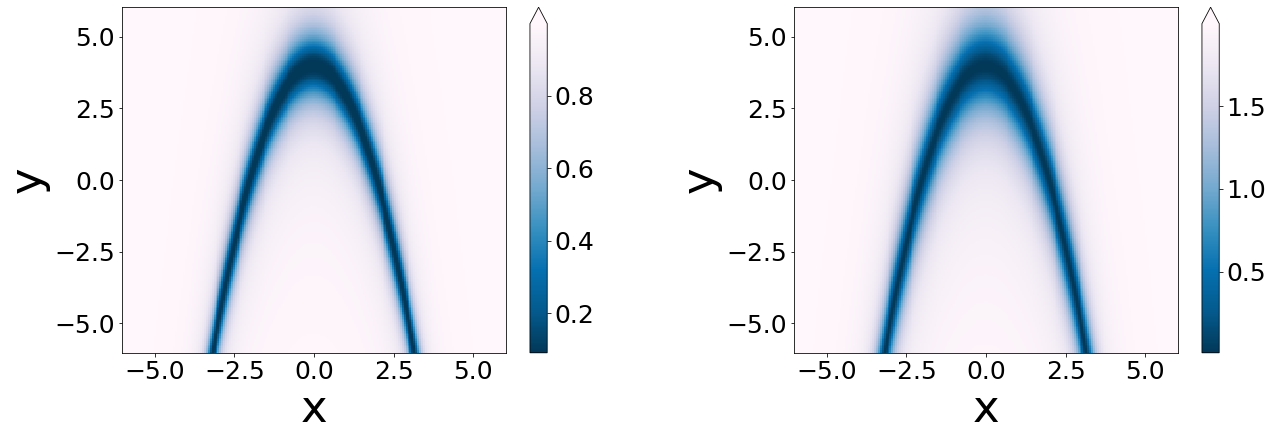

In [223]:
m1=1/10000
M=1
m=0.01
M1=1/2

def getg(x,y):
    f=((y+x*x-4)*(y+x*x-4))
    f2=f*f;
    xi=np.sqrt(m+f2);
    den=1/xi+1/M;
    g=1/den;
    return(g);

def getg2(x,y):
    f=1/((y+x*x-4)*(y+x*x-4))
    f2=f*f;
    xi=np.sqrt(1+m1*f2);
    den=M1*xi+np.sqrt(f2);
    g=xi/den;
    return(g);

nbins=200
bound=6
X = np.linspace(-bound,bound,nbins)
Y = np.linspace(-bound,bound,nbins)
X, Y = np.meshgrid(X, Y)
Z =getg(X,Y)
fig, (axs)= plt.subplots(1, 2,figsize=(20,6))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
pcm = axs[0].pcolor(X, Y, Z,
                #    norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r', shading='auto')
axs[0].set_xlabel("x",fontsize=font_size)
axs[0].set_ylabel("y",fontsize=font_size)
fig.colorbar(pcm, ax=axs[0], extend='max')

Z1=getg2(X,Y)
pcm = axs[1].pcolor(X, Y, Z1,
                #    norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r', shading='auto')
axs[1].set_xlabel("x",fontsize=font_size)
axs[1].set_ylabel("y",fontsize=font_size)
fig.colorbar(pcm, ax=axs[1], extend='max')


# Visualise few trajectories 


KeyboardInterrupt: 

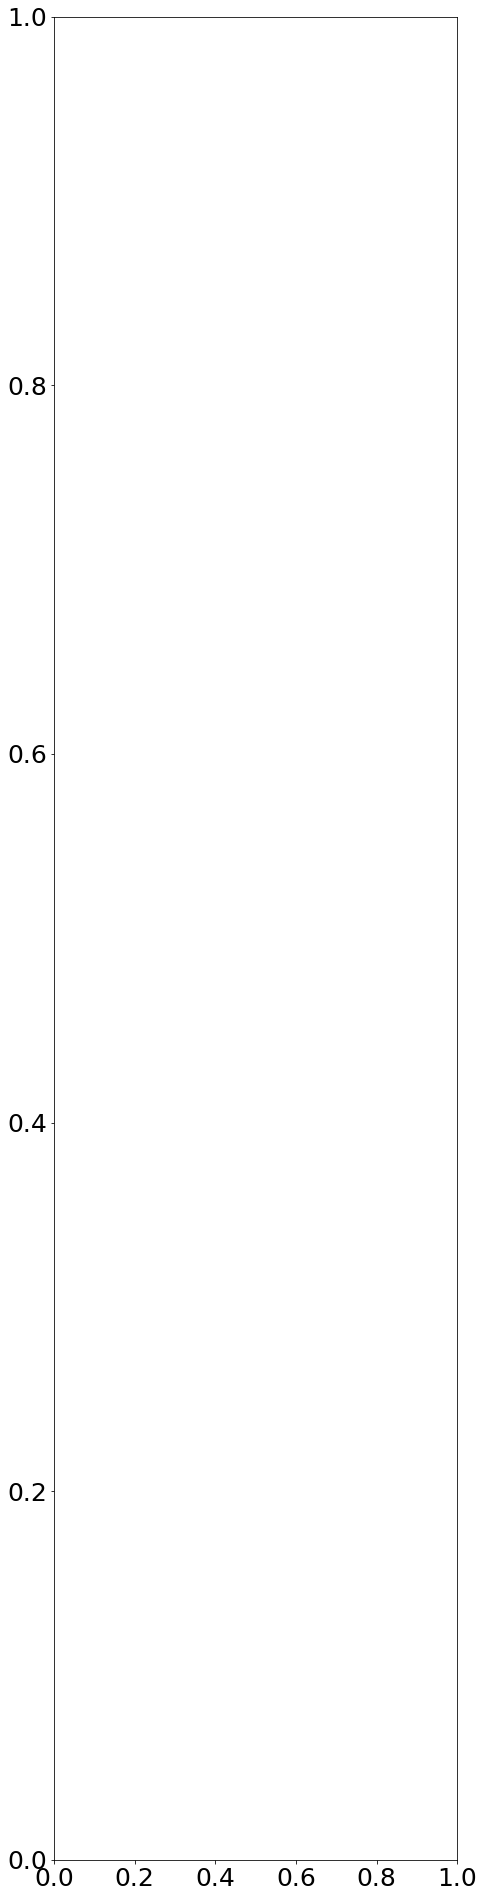

In [151]:
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/fewtraj2d")

fig, ((axs))= plt.subplots(numsam,1,figsize=(7,32))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
range_bins=[-3.,3.]
font_size=45

for i in range(numsam):
    filename= "vec_noada_x"+str(i)+".txt"
    q_noadax,p_noada,g=openCfile_qp(filename)
    filename= "vec_tr_x"+str(i)+".txt"
    q_trx,p_tr,g=openCfile_qp(filename)
    filename= "vec_tr_g"+str(i)+".txt"
    g,p_trnone,gnone=openCfile_qp(filename)


    filename= "vec_noada_y"+str(i)+".txt"
    q_noaday,p_noada,g=openCfile_qp(filename)
    filename= "vec_tr_y"+str(i)+".txt"
    q_try,p_tr,g=openCfile_qp(filename)
    filename= "vec_tr_g"+str(i)+".txt"
    g,p_trnone,gnone=openCfile_qp(filename)

    # Q
    ###
    axs[i].plot(q_noadax,q_noaday,"x",markersize=0.5,linewidth=lw,label='Underdamped SDE',color=myred)
    axs[i].plot(q_trx,q_try,"x",markersize=0.5,linewidth=lw,alpha=0.9,label='Transformed\nunderdamped SDE',color=myblue)
    # start point
    axs[i].plot(q_noadax[0],q_noaday[0],"o",markersize=10.,linewidth=lw,color=mygreen)
    axs[i].plot(q_trx[0],q_try[0],"o",markersize=10,linewidth=lw,label='Start',color=mygreen)
    #end point 
    axs[i].plot(q_noadax[-1],q_noaday[-1],"o",markersize=10.,linewidth=lw,color=myyellow)
    axs[i].plot(q_trx[-1],q_try[-1],"o",markersize=10,linewidth=lw,label='End',color=myyellow)

    axs[i].set_ylim(-1.5,1.5)
    axs[i].set_xlim(-1.5,1.5)

    axs[i].set_xlabel("q", fontsize=font_size)

    axs[i].legend(fontsize=font_size/3,loc="upper right",ncol=1,bbox_to_anchor=(1.2, 1.42))


## Look at the accuracy you obtain by plotting the accuracy on the different moments

Compute the moments


In [275]:
## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
import scipy.integrate as integrate

range_int=[-15,15]
a=range_int[0]
b=range_int[1]
s=0.1
def U(x,y):
   return(Utest(x,y,0.1,50,50,0.05))

def target(x,y):
    return np.exp(-U(x,y)/tau)

def mom_3(x,y):
   return np.exp(-U(x,y)/tau)*U(x,y)
normalising_cst=integrate.dblquad(target,a,b,a,b)[0]
print("Normalising constant \n")
print(normalising_cst)
true_mom_3=integrate.dblquad(mom_3,a,b,a,b)[0]/normalising_cst
print("Energie average")
print(true_mom_3)
true_mom_1=0
true_mom_2=0
def mom_4(x,y):
   return np.exp(-U(x,y)/tau)*y*y

def mom_5(x,y):
   return np.exp(-U(x,y)/tau)*x*x

true_mom_4=integrate.dblquad(mom_4,a,b,a,b)[0]/normalising_cst
true_mom_5=integrate.dblquad(mom_5,a,b,a,b)[0]/normalising_cst
print(true_mom_4)
print(true_mom_5)



Normalising constant 

8.137366552297406e-11
Energie average
2.336825314184192
2.7022988805201016
0.0


In [42]:
#######################################################
##### read file from c code
#######################################################
def openCfile(file):
    """
    Open the C txt file in order to obtain a matrix of results 
    -----------
    Input
    -----------
    file: txt file
        a file containing the results from the C simulation

    Return
    -----------
    mat: list of list
        A matrix containing the results of the simulations 
    """
    with open(file) as f:
        cols = f.readlines() #columns in the txt file
    n_col = len(cols) #number of columns in the text file
    mat=[] # matrix 
    for i in range(n_col): # for each columns 
        elems_i=cols[i].split(" ") #split the elements using " "
        col_i=[] #create an empty column i 
        for elem in elems_i: #for each element of the list 
            if elem!="\n" and elem!=" ": #compare each elements and discard " " and "\n"
                col_i.append(float(elem)) #append elems that are floats to the vector of interest
        mat.append(col_i) #create the matrix
    mat=np.array(mat)
    return(mat) #return the value of the matrix.


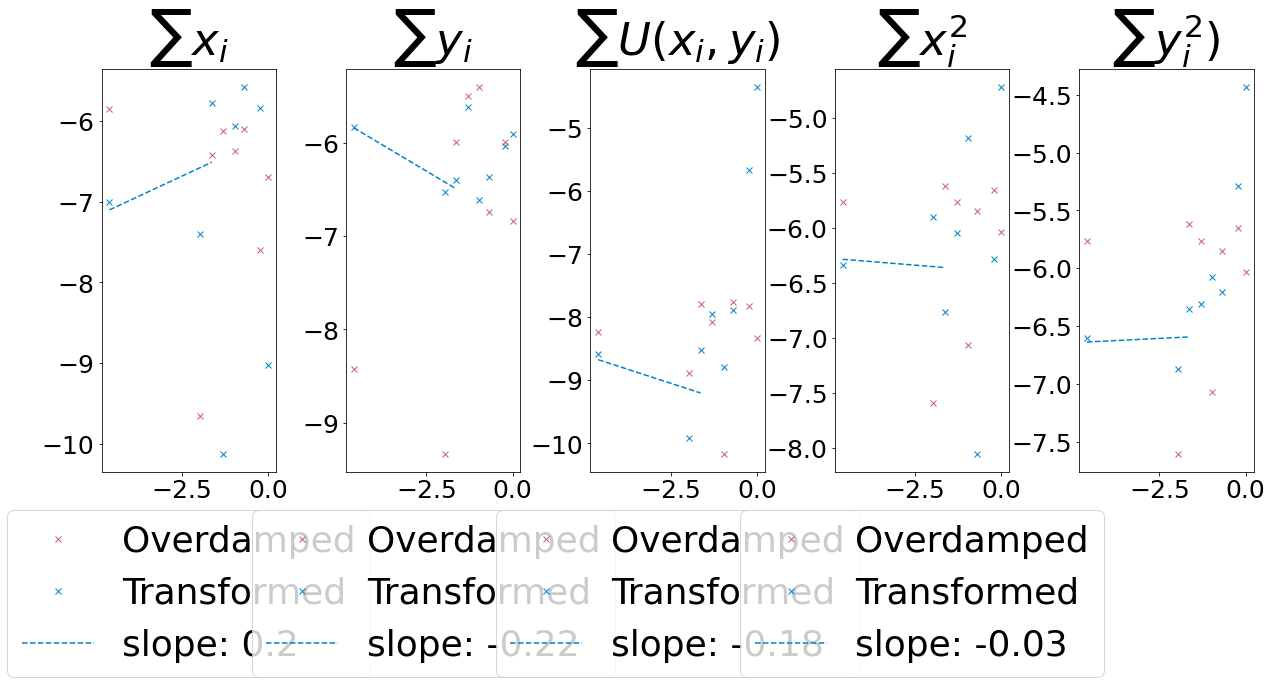

In [56]:
# ###########################################
# ## Set up the path
# ###########################################
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped_2d/"

dtlist=np.array([0.01, 0.14 , 0.195, 0.273, 0.38,0.5,0.8,1.]) #//# , 0.531, 0.741, 1.034, 1.443, 2.014])
# ###########################################
# ## Interpolate the slope
# ###########################################
xm= np.log(dtlist)
lb=0
ub=-5
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4,ax5)= plt.subplots(1,5,figsize=(20,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax1.set_title("$\\sum x_i$",fontsize=font_size)
ax2.set_title("$\\sum y_i$",fontsize=font_size)
ax3.set_title("$\\sum U(x_i,y_i)$",fontsize=font_size)
ax4.set_title("$\\sum x^2_i$",fontsize=font_size)
ax5.set_title("$\\sum y^2_i)$",fontsize=font_size)

# ax4.set_title("Average value taken by g",fontsize=font_size)

## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile(path+"/noada_moment1.txt"))
mom2_list=np.hstack(openCfile(path+"/noada_moment2.txt"))
mom3_list=np.hstack(openCfile(path+"/noada_moment3.txt"))
mom4_list=np.hstack(openCfile(path+"/noada_moment4.txt"))
mom5_list=np.hstack(openCfile(path+"/noada_moment5.txt"))

# mom4_list=np.hstack(openCfile("overdamped_2d/noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)
mom5_list=np.abs(mom5_list-true_mom_5)


#Plot moments
ax1.plot(xm,np.log(mom1_list),"x",color=myred,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myred,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myred,label=lab)
ax4.plot(xm,np.log(mom5_list),"x",color=myred,label=lab)
ax5.plot(xm,np.log(mom5_list),"x",color=myred,label=lab)

# ax4.plot(xm,np.log(mom4_list),"x",color=myred,label=lab)


## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile(path+"/tr_moment1.txt"))
mom2_list=np.hstack(openCfile(path+"/tr_moment2.txt"))
mom3_list=np.hstack(openCfile(path+"/tr_moment3.txt"))
mom4_list=np.hstack(openCfile(path+"/tr_moment4.txt"))
mom5_list=np.hstack(openCfile(path+"/tr_moment5.txt"))

g_vals=np.hstack(openCfile(path+"/tr_moment6.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)
mom5_list=np.abs(mom5_list-true_mom_5)

ax1.plot(xm,np.log(mom1_list),"x",color=myblue,label=lab)
ax2.plot(xm,np.log(mom2_list),"x",color=myblue,label=lab)
ax3.plot(xm,np.log(mom3_list),"x",color=myblue,label=lab)
ax4.plot(xm,np.log(mom4_list),"x",color=myblue,label=lab)
ax5.plot(xm,np.log(mom5_list),"x",color=myblue,label=lab)

# ax5.plot(xm,g_vals,"-",color=mygrey,label=lab)


## interpolation linear  
#first moment
m, c = np.linalg.lstsq(A, np.log(mom1_list)[lb:ub], rcond=None)[0]
ax1.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#second moment
m, c = np.linalg.lstsq(A, np.log(mom2_list)[lb:ub], rcond=None)[0]
ax2.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#third moment
m, c = np.linalg.lstsq(A, np.log(mom3_list)[lb:ub], rcond=None)[0]
ax3.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#fourth moment
m, c = np.linalg.lstsq(A, np.log(mom4_list)[lb:ub], rcond=None)[0]
ax4.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)
#fifth moment
m, c = np.linalg.lstsq(A, np.log(mom5_list)[lb:ub], rcond=None)[0]
ax5.plot(x, m*x + c,"--",label="slope: "+str(round(m,2)),color=myblue)


ax1.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax2.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax3.legend(fontsize=font_size*0.8,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
ax4.legend(fontsize=font_size*0.8,ncol=1,loc="upper center",bbox_to_anchor=(0.5, -0.05))

# os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations")

# ax1.set_ylim(-8,2)
# ax2.set_ylim(-8,2)
# ax3.set_ylim(-8,2)
# ax4.set_ylim(0.7,1.3)

# fig.savefig("figures/moments_logplot_overdamped_2d.eps")

